**USING BRUTE-FORCE MATCHING WITH SIFT DESCRIPTORS AND RATIO TEST**

**SIFT :- SCALE INVARIANT FEATURE TRANSFORM**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [3]:
reeses = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/reeses_puffs.png",0)

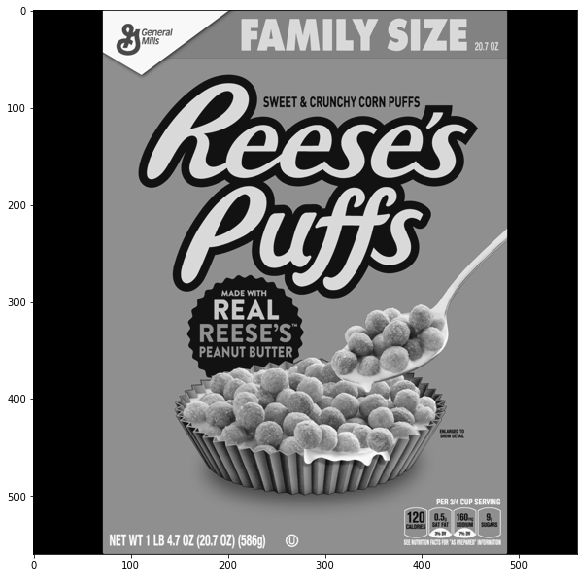

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

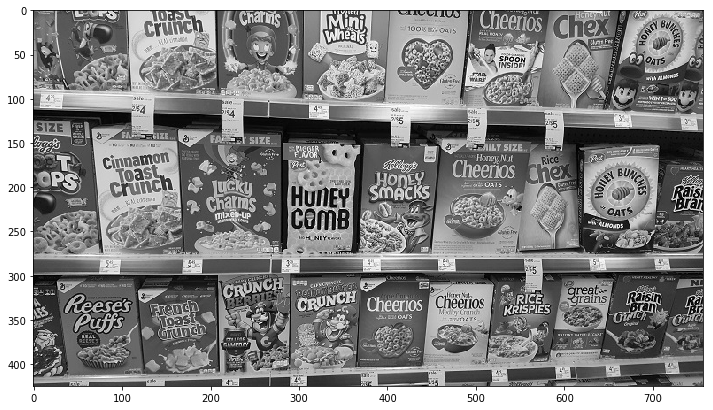

In [6]:
display(cereals)

In [7]:
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher()

In [10]:
des1

array([[ 15.,   0.,   0., ...,  11.,   1.,   0.],
       [ 21.,   0.,   0., ...,   0.,  10.,  13.],
       [150.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 27.,   0.,   0., ...,   0.,   0.,   0.],
       [ 48.,   0.,   0., ...,   0.,   1.,   0.],
       [ 35.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [11]:
matches = bf.knnMatch(des1,des2,k = 2)

In [12]:
matches

[[<DMatch 0x7f0df70e4970>, <DMatch 0x7f0df70e4f50>],
 [<DMatch 0x7f0df97795d0>, <DMatch 0x7f0df97795f0>],
 [<DMatch 0x7f0df97798d0>, <DMatch 0x7f0df9779630>],
 [<DMatch 0x7f0df9779b10>, <DMatch 0x7f0df9779f30>],
 [<DMatch 0x7f0df9779cd0>, <DMatch 0x7f0df9779d50>],
 [<DMatch 0x7f0df9779a90>, <DMatch 0x7f0df9779d90>],
 [<DMatch 0x7f0df9779cf0>, <DMatch 0x7f0df9779c10>],
 [<DMatch 0x7f0df9779bb0>, <DMatch 0x7f0df9779e90>],
 [<DMatch 0x7f0df9779f10>, <DMatch 0x7f0df9779e50>],
 [<DMatch 0x7f0df9779f50>, <DMatch 0x7f0df9779eb0>],
 [<DMatch 0x7f0df72ff130>, <DMatch 0x7f0df72ff110>],
 [<DMatch 0x7f0df72ff0f0>, <DMatch 0x7f0df72ff0d0>],
 [<DMatch 0x7f0df72ff0b0>, <DMatch 0x7f0df72ff150>],
 [<DMatch 0x7f0df72ff170>, <DMatch 0x7f0df72ff190>],
 [<DMatch 0x7f0df72ff1b0>, <DMatch 0x7f0df72ff1d0>],
 [<DMatch 0x7f0df72ff1f0>, <DMatch 0x7f0df72ff210>],
 [<DMatch 0x7f0df72ff230>, <DMatch 0x7f0df72ff250>],
 [<DMatch 0x7f0df72ff270>, <DMatch 0x7f0df72ff290>],
 [<DMatch 0x7f0df72ff2b0>, <DMatch 0x7f0df72ff

**HERE WE HAVE TWO MATCHES BECAUSE THE VALUE OF K GIVEN IS 2.**

In [15]:
good = []

# LESS DISTANCE == BETTER MATCH
# RATIO TEST < 75% MATCH 2
for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% IF MATCH 2 DISTANCE ,
    # THEN DESCRIPTOR WAS A GOOD MATCH.
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [16]:
good

[[<DMatch 0x7f0df72ffa70>],
 [<DMatch 0x7f0df7272070>],
 [<DMatch 0x7f0df72720b0>],
 [<DMatch 0x7f0df72722b0>],
 [<DMatch 0x7f0df72728b0>],
 [<DMatch 0x7f0df7272bb0>],
 [<DMatch 0x7f0df7272d30>],
 [<DMatch 0x7f0df72730f0>],
 [<DMatch 0x7f0df7273330>],
 [<DMatch 0x7f0df72736f0>],
 [<DMatch 0x7f0df72737f0>],
 [<DMatch 0x7f0df7274ab0>],
 [<DMatch 0x7f0df7274af0>],
 [<DMatch 0x7f0df7274bf0>],
 [<DMatch 0x7f0df72769b0>],
 [<DMatch 0x7f0df7278370>],
 [<DMatch 0x7f0df7278430>],
 [<DMatch 0x7f0df72784f0>],
 [<DMatch 0x7f0df7278d70>],
 [<DMatch 0x7f0df7278eb0>],
 [<DMatch 0x7f0df727d030>],
 [<DMatch 0x7f0df727d170>],
 [<DMatch 0x7f0df727d1b0>],
 [<DMatch 0x7f0df727d370>],
 [<DMatch 0x7f0df727d3b0>],
 [<DMatch 0x7f0df727f5f0>],
 [<DMatch 0x7f0df727f770>],
 [<DMatch 0x7f0df727f7b0>],
 [<DMatch 0x7f0df727fd70>],
 [<DMatch 0x7f0df727fe70>],
 [<DMatch 0x7f0df727ff30>],
 [<DMatch 0x7f0df7281530>],
 [<DMatch 0x7f0df72818b0>],
 [<DMatch 0x7f0df7281970>],
 [<DMatch 0x7f0df7281e70>],
 [<DMatch 0x7f0df720

In [17]:
len(good)

78

In [18]:
len(matches)

1501

In [20]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2,good,None, flags = 2)

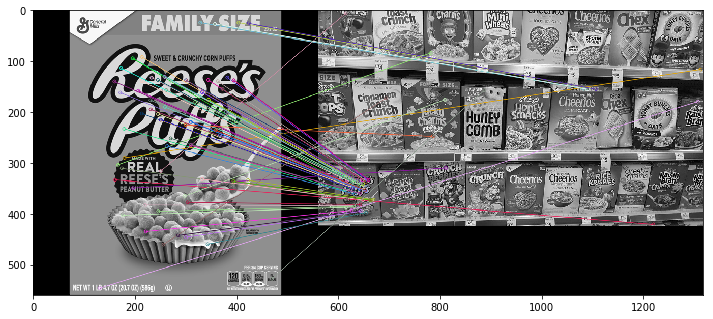

In [21]:
display(sift_matches)

**HERE WE SEE THAT THE MATCHING IS MUCH BETTER THAN THE LAST METHOD**



**FLANN BASED MATCHER**

**FLANN - FAST LIBRARY FOR APPROXIMATE NEAREST NEIGHBOURS.**

Its much faster than other two methods but wont find much specific matches..rather would find much general matches.

In [22]:
sift = cv2.xfeatures2d.SIFT_create()

In [23]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [24]:
# FLANN PARAMETERS
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_parameters = dict(checks = 50)

In [25]:
flann = cv2.FlannBasedMatcher(index_params,search_parameters)

In [26]:
matches = flann.knnMatch(des1,des2,k = 2) 

In [27]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [32]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2,good, None,flags = 0)

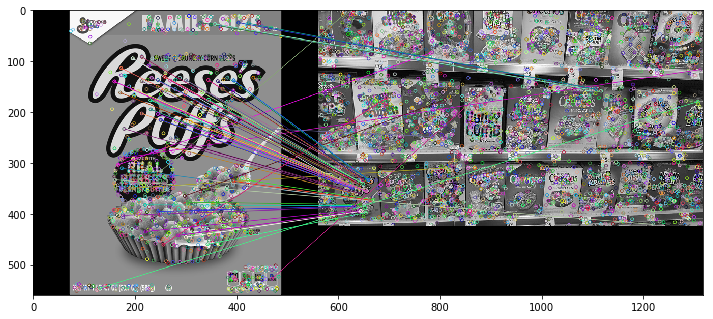

In [33]:
display(flann_matches)

In [34]:
sift = cv2.xfeatures2d.SIFT_create()

In [35]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [36]:
# FLANN PARAMETERS
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_parameters = dict(checks = 50)

In [37]:
flann = cv2.FlannBasedMatcher(index_params,search_parameters)

In [38]:
matches = flann.knnMatch(des1,des2,k = 2) 

In [39]:
matchesMask = [[0,0] for i in range(len(matches))]

In [41]:

for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
        

In [50]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

In [51]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

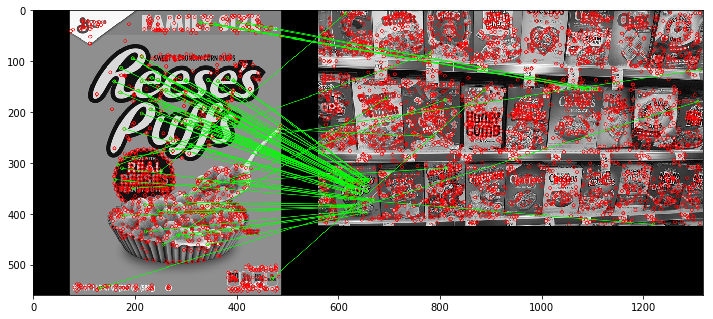

In [52]:
display(flann_matches)